In [1]:
from lsmulator import *
from workloads import *
import numpy as np
import matplotlib.pyplot as plt
from figure_grid import *

# Optimization

In [2]:
zipfs = [ZipfWorkload(zipf_param=1.1),
         ZipfWorkload(zipf_param=1.25),
         ZipfWorkload(zipf_param=1.5)]

In [3]:
timedecs = [DiscoverDecayWorkload(),
            DiscoverDecayWorkload(discoveries=scipy.stats.poisson(5)),
            DiscoverDecayWorkload(decay_rate=scipy.stats.beta(10, 1)),
            DiscoverDecayWorkload(decay_rate=scipy.stats.beta(1, 1))]

In [4]:
robins = [RoundRobinWorkload()]

In [5]:
def optimize(workload, total_memory, db=10):
  lsmtree = lsmulate(workload.queries)
  layer_sizes = [l.size for l in lsmtree.layers()]
  trees = []
  bloom_size = 0
  while True:
    cache_size = total_memory - bloom_size*len(layer_sizes)
    if cache_size < 0: break
    trees.append(lsmulate(workload.queries, cache_size=cache_size, bloom_size=bloom_size))
    bloom_size += db
  return trees

In [25]:
trees = optimize(zipfs[2], 1000)

In [28]:
trees2 = optimize(zipfs[0], 1000)

In [11]:
trees3 = optimize(timedecs[0], 10000)

In [18]:
trees4 = optimize(robins[0], 1000)

In [32]:
trees5 = optimize(timedecs[-1], 2000)

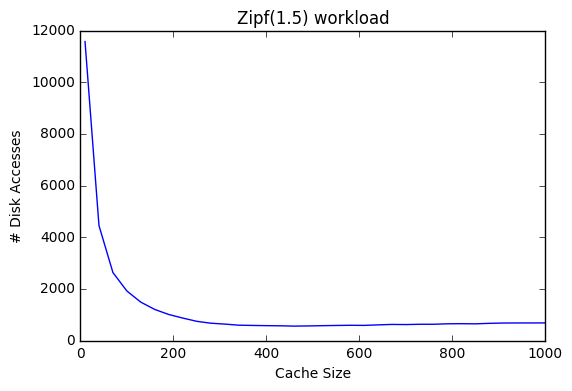

In [27]:
plt.title('Zipf(1.5) workload')
plt.plot([t.cache.size for t in trees], [t.disk_accesses() for t in trees])
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.show()

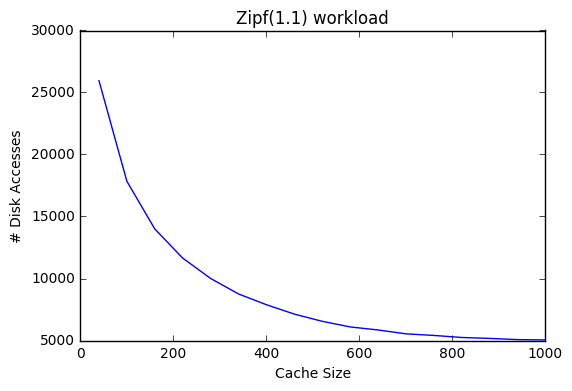

In [29]:
plt.title('Zipf(1.1) workload')
plt.plot([t.cache.size for t in trees2], [t.disk_accesses() for t in trees2])
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.show()

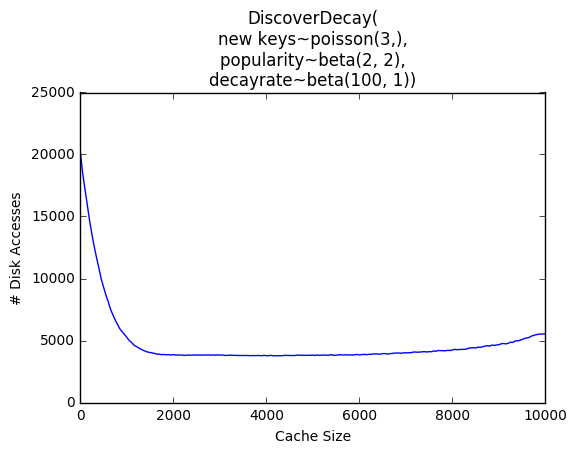

In [17]:
plt.title(timedecs[0].__str__())
plt.plot([t.cache.size for t in trees3], [t.disk_accesses() for t in trees3])
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.show()

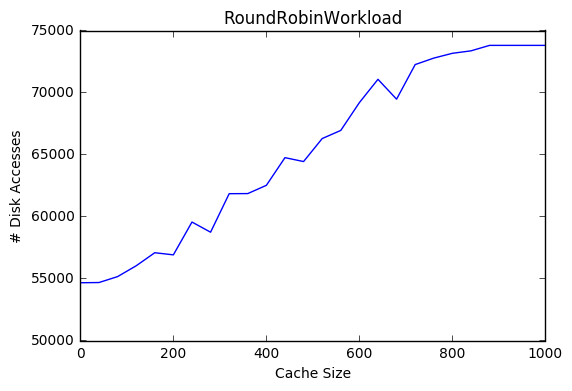

In [19]:
plt.title(robins[0].__str__())
plt.plot([t.cache.size for t in trees4], [t.disk_accesses() for t in trees4])
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.show()

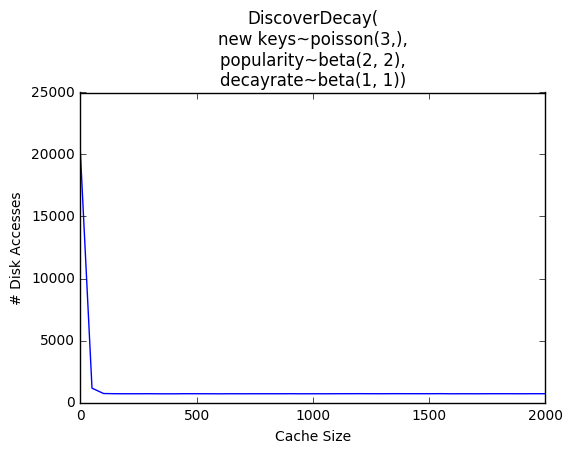

In [34]:
plt.title(timedecs[-1].__str__())
plt.plot([t.cache.size for t in trees5], [t.disk_accesses() for t in trees5])
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.show()

In [22]:
lsmulate(timedecs[0].queries, bloom_size=10).disk_accesses()

46027

In [23]:
lsmulate(timedecs[0].queries, bloom_size=100).disk_accesses()

41879

In [24]:
lsmulate(timedecs[0].queries, bloom_size=1000).disk_accesses()

22128